<div class="info">
<b>PROBLEM SHEET 7:</b>    Numerical Integration

**Important note:** all integrals in this exercise will be calculated numerically.
This week the Python exercises relate to PH2210, the lecture course in Quantum Mechanics. Using Python’s numerical integration and plotting features the exercises below shouldreinforce the concepts of orthogonality and completeness of the normalised wavefunctions.

New Python syntax that will be needed will be introduced in the first lecture of the week:

### Standard Header
As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [2]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib widget 
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt

# notice two underscores _ either side of future

### PS7 Ex1: The 1D infinite square well (Marks 3/10)

The 1D infinite square well is described by the potential: $V=0$ for $0< x <L$, and $V=\infty$ otherwise.
Solving the TISE, $\hat{H} \psi = E \psi$, in lectures you have obtained the
following wavefunctions (eigenfunctions) and energies (eigenvalues):
\begin{equation}
\psi_n (x) = \sqrt{\frac{2}{L}} \sin \left( \frac{n \pi x}{L} \right)
\end{equation}
\begin{equation}
\label{e:sqen}
E_n = \frac{\hbar ^2 k^2} {2m} = \frac{\hbar ^2 }{2m} \frac{n^2 \pi ^2}{L^2}
\end{equation}

We are going to demonstrate various properties of the square well; to numerically calculate the different integrals (orthogonalities, expectation values, etc.) you will need to set $L=1$.
1. Plot separately $\psi_3(x)$, $\psi_4(x)$ and the product $\psi_3(x) \times \psi_4(x)$. Show that you would expect the latter to integrate to zero.
2. Using *scipy.integrate.quad* and a *user defined function* for the wavefunction integrate the product $\psi_3(x) \times \psi_4(x)$ between 0 and $L$ to show that $\psi_3$ and $\psi_4$ are *orthogonal*.
3. By printing the results of integration for different values of $n$ and $m$, $(e.g. (n=3, m=3), (n=3, m=5),(n=5, m=5),(n=5, m=6))$, confirm that the wavefunctions are orthogonal and normalised: $$\int_{0}^{L} \psi_m^*(x) \,  \psi_n(x) \, dx= \delta_{n,m}$$ 
4. Show that the expectation value $\langle x \rangle =\int_{0}^{L} \psi_n^*(x) \, x \psi_n(x) \, dx =L/2$ for states with quantum number $n=4, 7$, and 9.
5. Calculate $\langle x^2 \rangle$ and $\Delta x = \sqrt{\langle x^2 \rangle -\langle x \rangle^2}$ for $n=4, 7$, and 30.
6. Demonstrate that as $n \rightarrow$ large, $\Delta x \rightarrow L/\sqrt{12}$. How does this result compare to the classical result? Remember classically $\langle x \rangle =\int_{0}^{L} x P(x) \, dx$ 



In [3]:
#PS7 Ex1:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

## Question 1
# Generate empty plots
fig1 = plt.figure()
axe1 = fig1.add_subplot()
fig2 = plt.figure()
axe2 = fig2.add_subplot()
fig3 = plt.figure()
axe3 = fig3.add_subplot()

# Assign L=1 for plots
L = 1

# Generate x values
x = np.arange(0, L, 0.01)

# Define wave functions
wf3 = np.vectorize(lambda x : np.sqrt(2/L)*np.sin((3*np.pi*x)/L))
wf4 = np.vectorize(lambda x : np.sqrt(2/L)*np.sin((4*np.pi*x)/L))
wf34 = np.vectorize(lambda x : (np.sqrt(2/L)*np.sin((3*np.pi*x)/L)*(np.sqrt(2/L)*np.sin((4*np.pi*x)/L))))

# Plot n=3
axe1.plot(x, wf3(x))
axe1.set_xticks([0,0.5,1])
axe1.set_xticklabels(['0','L/2','L'])

# Plot n=4
axe2.plot(x, wf4(x))
axe2.set_xticks([0,0.5,1])
axe2.set_xticklabels(['0','L/2','L'])

# Plot n=3*n=4
axe3.plot(x, wf34(x))
axe3.set_xticks([0,0.5,1])
axe3.set_xticklabels(['0','L/2','L'])

plt.show()

## Question 2
inte = integrate.quad(wf34, 0, 1)
print(f"integral of psi3 x psi4 = {inte[0]} ≈ 0")
# Result is 10^-17 so close enough to zero. Error is due to numerical method not algebreic method

## Question 3
print("\nQuestion 3\n")


# define a wavefunction n times a wavefunction m
def wf(n, m):
    return np.vectorize(lambda x : (np.sqrt(2/L)*np.sin((n*np.pi*x)/L)*(np.sqrt(2/L)*np.sin((m*np.pi*x)/L))))

# for a few trial n and m
for i in [[3, 3], [3, 5], [5, 5], [5, 6], [7, 7], [7, 9]]:
    inte = integrate.quad(wf(i[0], i[1]), 0, 1)[0]
    print(f"integral of psi{i[0]} x psi{i[1]} = {inte} ≈ {round(inte)}")

## Question 4
print("\nQuestion 4\nas L=1\n")

# define psi * psiconj * x
def expectation(n):
    return np.vectorize(lambda x : x*(np.sqrt(2/L)*np.sin((n*np.pi*x)/L)*(np.sqrt(2/L)*np.sin((n*np.pi*x)/L))))

for i in [4, 7, 9]:
    inte = integrate.quad(expectation(i), 0, 1)[0]
    print(f"expectation value at n={i} = {inte} ≈ {round(inte, 2)} ≈ L/2")
    
## Question 5
print("\nQuestion 5\n")

## Define <x^2> using (x**2)
def square_expectation(n):
    return np.vectorize(lambda x : (x**2)*(np.sqrt(2/L)*np.sin((n*np.pi*(x**2))/L)*(np.sqrt(2/L)*np.sin((n*np.pi*(x**2))/L))))

for i in [4, 7, 30]:
    print(f"For n = {i}")
    ## <x^2>
    sq_x = integrate.quad(square_expectation(i), 0, 1)[0]
    ## <x>^2
    x_sq = integrate.quad(expectation(i), 0, 1)[0]**2
    print(f"<x^2> = {sq_x}")
    print(f"delta x = {np.sqrt(sq_x - x_sq)}")

## Question 6
print("\nQuestion 6\n")
# using powers of 2

for i in range(2, 7):
    print(f"For n = 2^{i}")
    ## <x^2>
    sq_x = integrate.quad(square_expectation(2**i), 0, 1)[0]
    ## <x>^2
    x_sq = integrate.quad(expectation(2**i), 0, 1)[0]**2
    delta_x = np.sqrt(sq_x - x_sq)
    print(f"delta x = {delta_x} ")
    print(f"error on L/sqrt(12) = {(abs(delta_x - L/np.sqrt(12)))/(L/np.sqrt(12))}")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

integral of psi3 x psi4 = 2.842731760627964e-17 ≈ 0

Question 3

integral of psi3 x psi3 = 1.0000000000000004 ≈ 1
integral of psi3 x psi5 = 2.220446049250313e-16 ≈ 0
integral of psi5 x psi5 = 1.0000000000000002 ≈ 1
integral of psi5 x psi6 = -1.2877078029661705e-16 ≈ 0
integral of psi7 x psi7 = 1.0 ≈ 1
integral of psi7 x psi9 = 2.7755575615628914e-17 ≈ 0

Question 4
as L=1

expectation value at n=4 = 0.5000000000000002 ≈ 0.5 ≈ L/2
expectation value at n=7 = 0.5000000000000001 ≈ 0.5 ≈ L/2
expectation value at n=9 = 0.5 ≈ 0.5 ≈ L/2

Question 5

For n = 4
<x^2> = 0.3354248071125963
delta x = 0.2922752249380643
For n = 7
<x^2> = 0.3342783419081791
delta x = 0.29030732320797387
For n = 30
<x^2> = 0.3334473705558318
delta x = 0.28887258533102733

Question 6

For n = 2^2
delta x = 0.2922752249380643 
error on L/sqrt(12) = 0.01247107877269891
For n = 2^3
delta x = 0.29002350126826276 
error on L/sqrt(12) = 0.004670879171295515
For n = 2^4
delta x = 0.2891702751815526 
error on L/sqrt(12) = 0.00

## PS7 Ex2: Completness (Marks 3/10)

An initial wavefunction in the well is given by
$$A(x)= \left (\frac{x}{L}\right )^3 -\frac{11}{7}\left (\frac{x}{L}\right )^2 +\frac{4}{7}
\left (\frac{x}{L}\right ).$$ with $L$=1.

* Plot $A(x)$ and confirm that it satisfies the boundary conditions at $x=0$ and $L$.
* Show that the *normalisation constant* for $A(x)$ is $\sqrt{735}$.
* The eigenfunctions for the square well $\psi_n(x)$ form a *complete set*. That is, any function $f(x)$ defined in the same region of space and satisfying the same boundary conditions can be expressed as $f(x)=\sum_{n} c_n \psi_n(x)$, where $c_n = \int_{0}^{L} \psi_n^*(x) \,  f(x) \, dx$. Taking $f(x)=A(x)$ and using the wavefunctions $\psi_n$ defined above, write a program to calculate the coefficients $c_n$.
* Show that $c_1=0.353298$, $c_2=0.927407$,  $c_3=0.0130851$,  $c_4=0.115926$, $c_5=0.00282638$, $c_6=0.0343484$, and that higher coefficients are much smaller. 
* Show that $$\sum_{i=1}^{i=\infty}  |c_i|^2=1.$$   Choose a large number to replace $\infty$ in the sum.
* Show that $$\sum_{i=1}^{i=\infty}  |c_i|^2 i^2=3.849.$$
* Therefore show that the expectation value for the energy is $\langle E \rangle =3.849 E_0$, where $E_0$ is the energy of the ground state.


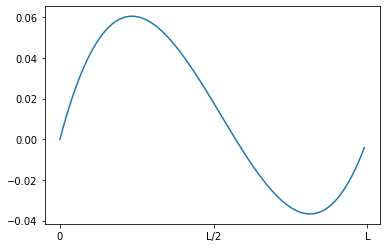

In [1]:
#PS7 Ex2:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

## Question 1
# Generate empty plots
fig = plt.figure()
axe = fig.add_subplot()

# Assign L=1 for plots
L = 1

# Generate x values
x = np.arange(0, L, 0.01)

# Define wavefunction
A = np.vectorize(lambda x : (x/L)**3 - (11/7)*((x/L)**2) + (4/7)*(x/L))

# Plot A
axe.plot(x, A(x))
axe.set_xticks([0,0.5,1])
axe.set_xticklabels(['0','L/2','L'])


plt.show()


### PS7 Ex3: Quantum Harmonic Oscillator (Marks 4/10)

The wavefunctions in a parabolic potential, $$V(x)=\frac{1}{2} k x^2 = \frac{1}2{} m \omega^2 x^2$$  are given by:
$$\psi_n(x) = \frac{H_n(x/a)}{\sqrt{2^n \, n! \, \sqrt{\pi \, a^2}}} \,   e^{-\frac{x^2}{2 a^2}} ,$$
where $H_n(x)$ are the Hermite polynomials encountered in PH2130 and $a$ is a length given by $a=\sqrt{\frac{\hbar}{m \omega}}$.
The energy of the $n^{th}$ quantum state is $E_n = (n + \frac{1}{2}) \hbar \omega $.   Note that for the QHO the ground state is $n=0$, whereas in the infinite square well it is $n=1$.

1. In Python write the code to generate the Hermite polynomials for arbitrary $n$. Generate the normalised wavefunctions tabulated below for $n=0, 1, 2, 3$ and 4; you will need to take $a=1$.


| $n$| $\psi_n(x)$  | 
|---:|------------:-------------|
| 0 | $\psi_0(x) = \frac{1}{\sqrt[4]{\pi a^2}} \, e^{-\frac{x^2}{2 a^2}}$ |
| 1 | $\psi_1(x) = \frac{\sqrt{2} \, (x/a)}{\sqrt[4]{\pi a^2}} \, e^{-\frac{x^2}{2 a^2}}$  |
| 2 | $\psi_2(x) = \frac{[4(x/a)^2-2]}{2 \sqrt{2} \, \sqrt[4]{\pi a^2}} \, e^{-\frac{x^2}{2 a^2}}$  |
| 3 | $\psi_3(x) = \frac{[8(x/a)^3-12(x/a)]}{4 \sqrt{3} \, \sqrt[4]{\pi a^2}} \, e^{-\frac{x^2}{2 a^2}}$  |
| 4 |  $\psi_4(x) = \frac{[16(x/a)^4-48(x/a)^2+12]}{8 \sqrt{6} \, \sqrt[4]{\pi a^2}} \, e^{-\frac{x^2}{2 a^2}}$  |

3. If the wavefunctions are orthogonal and normalised then $$\int_{-\infty}^{\infty} \psi_m^*(x) \,  \psi_n(x) \, dx= \delta_{n,m}.$$  Write a simple program to check this integral  for the five states above. You will not be able to integrate to $\pm \infty$, and you will have to make approximations.
4. Plot the wavefunction $\psi_n(x)$ and the probability densities $p_n(x)=|\psi_n(x)|^2$ for $n = 0$ to 10, see Figure 1.  For clarity the individual traces need to be vertically offset in an appropriate manner.
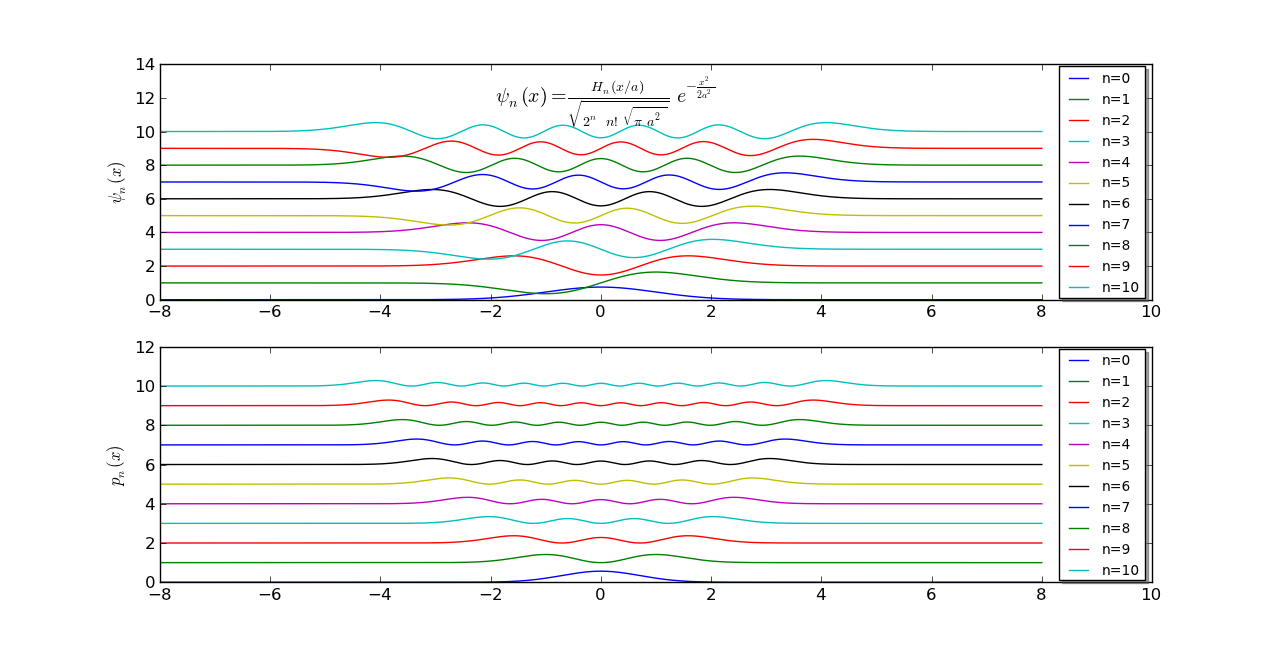
**Figure 1:** The wave functions $\psi_n(x)$ and probability densities $p_n(x)=|\psi_n(x)|^2$ for  the lowest energy states in a quantum harmonic oscillator

In [4]:
#PS7 Ex3:

from scipy import special
from scipy import constants
from scipy import integrate
import math

a = 1
## Question 1

# Parabolic Wavefunction using special.eval_hermite
def para_wf(n):
    return np.vectorize(lambda x : (special.eval_hermite(n, x/a)) / (np.sqrt( (2**n * special.factorial(n)) * np.sqrt(np.pi * a**2) )) * math.exp(((-1)*(x**2)) / (2*(a**2))))

## Question 3??

# Define psi_m * psi_n for integration
def integral(n, m):
    return np.vectorize(lambda x : (special.eval_hermite(m, x/a)) / (np.sqrt( (2**n * special.factorial(m)) * np.sqrt(np.pi * a**2) )) * math.exp(((-1)*(x**2)) / (2*(a**2))) * (special.eval_hermite(n, x/a)) / (np.sqrt( (2**n * special.factorial(n)) * np.sqrt(np.pi * a**2) )) * math.exp(((-1)*(x**2)) / (2*(a**2))))


# Check (n=m) = 1 for kronecker
for i in range(0, 5):
    inte = integrate.quad(integral(i, i), float('-inf'), float('inf'))[0]
    print(f"integral for psi{i}*psi{i} = {round(inte)}")

print("\n")    

# Check (n!=m) = 0  for kronecker
for i in range(0, 5):
    inte = integrate.quad(integral(i, i+1), float('-inf'), float('inf'))[0]
    print(f"integral for psi{i}*psi{i+1} = {round(inte)}")
    
## Question 4

fig4 = plt.figure()
axe4 = fig4.add_subplot()
fig5 = plt.figure()
axe5 = fig5.add_subplot()

x = np.arange(-8, 8, 0.01)

for i in range(0, 11):
    y = para_wf(i)
    # plot wavefunction with offset i
    axe4.plot(x, y(x)+i)
    # plot wavefunction squared with offset i
    axe5.plot(x, abs(y(x)**2 + i))
    
plt.show()


integral for psi0*psi0 = 1
integral for psi1*psi1 = 1
integral for psi2*psi2 = 1
integral for psi3*psi3 = 1
integral for psi4*psi4 = 1


integral for psi0*psi1 = 0
integral for psi1*psi2 = 0
integral for psi2*psi3 = 0
integral for psi3*psi4 = 0
integral for psi4*psi5 = 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
print(float('-inf'))

### After this point there are no more questions, just code examples to demonstrate the syntax

In [ ]:
#Example of numerical integration techniques
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt

def test2(x):
    """This is a function that can only be intergrated numerically"""
    y=np.cos(x**3+x) # test2 is a function that we can not integrate
    return y
def test4(x):
    """returns exp(-x)"""
    y=np.exp(-x)
    return y

test3=np.random.rand(100)# an array of 100 random numbers between 0 and 1
x=np.linspace(0,1,100) # x is an array from 0 to 1 in 100 steps

test1=np.poly1d([1,2,0]) # test1 is a a polynomial x**2 + 2x, i.e. something that we all remember how to integrate

plt.plot(x,test1(x), 'o',label=r'$x^2+2x$')#Latex code for label
plt.plot(x,test2(x),'o',label=r'$\cos(x^3 + x)$')#Latex code for label
plt.plot(x,test3, 'o',label='random')
plt.plot(x,test4(x), 'o',label=r'$exp(-x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.title('Functions to test integration')

print ('The result of using trapz to apply the trapizium rule method to the array test1 is,', si.trapz(test1(x),x))
print ('The result of using trapz to apply the trapizium rule method to the array test2 is,', si.trapz(test2(x),x))
print ('The result of using trapz to apply the trapizium rule method to the array test3 is,', si.trapz(test3,x))

print ('The result of using simps to apply the Simpson\'s rule method to the array test1 is,', si.simps(test1(x),x))
print ('The result of using simps to apply the Simpson\'s rule method to the array test2 is,', si.simps(test2(x),x))
print ('The result of using simps to apply the Simpson\'s rule method to the array test3 is,', si.simps(test3,x))


#When you kmow what the definition of the function is you can use the general purpose integration module Quad, to evaluate the definite integral.
Area,Error=si.quad(test2,0,1) # returns the value plus the estimate of error.
print ('The result of using Quad on test2 between limits of zero and 1 gives a value for the area {}, and an estimate of the error, {}'.format(Area,Error))
Area,Error=si.quad(test4,0.0,1) # returns the value plus the estimate of error.
print ('The result of using Quad on test4 between limits of zero and 1 gives a value for the area {}, and an estimate of the error, {}'.format(Area,Error))
Area,Error=si.quad(test4,0.0,np.inf) # returns the value plus the estimate of error.
print ('The result of using Quad on test4 between limits of zero and 1 gives a value for the area {}, and an estimate of the error, {}'.format(Area,Error))

plt.show()

### scipy.integrate.quad syntax and usage

In [ ]:
from scipy.integrate import quad
help(quad)

In [ ]:
from scipy.integrate import quad

# syntax
#scipy.integrate.quad(func, a, b, args=())

# func : function A Python function or method to integrate.
# a : Lower limit of integration (use -numpy.inf for -infinity).
# b : Upper limit of integration (use numpy.inf for +infinity).
# args : tuple, optional extra arguments to pass

def myfunc(x,n,w):
    """This is our test function to practice using the integration function quad,
    x is the first argument and is the variable axis that it is integrated along"""
    return n*x**w

# integrate the function 'myfunc' between the limits 0-1 setting n=2,w=3    
iprod, err = quad(myfunc, 0, 1, args=(2,3)) 

print ('value = %.3f' % iprod) # the evaluation of the integral of 2*x**3 between x=0 and x=1
print ('error= {}'.format(err)) # the numerical uncertainty in the integral
#Evaluating integral gives exact value as 0.5*x**4
print('Exact solution = {}'.format(0.5*1.0**4.))

### The Hermite polynomial

In [ ]:
import scipy
print(dir(scipy.special)) # prints all the functions in the library scipy.special
help(scipy.special.hermite)

In [ ]:
#An example of how to use the hermite polynomial from the scipy.special library
import scipy
from scipy.special import hermite
# This special function returns the nth hermite polynomial h_n(x), orthogonal over (-inf, inf) with weigthing function (exp(-x**2)
n=4
Herm4=scipy.special.hermite(n) # returns the nth polynomial in this case the 4th
print(Herm4)
print(type(Herm4))
# The polynomial is returned in the form of a poly1d array, a one dimensional polynomial class
# Read the poly1d help for more information, but X**4-2x**3+4x**-0.1x+7 would be returned as
# poly1d[1, -2, 4, -0.1, 7], with coefficeints given in decreasing power of x

# To evaluate Herm4 at a value of x=0.5, Herm4 is like a function with an arguement x

Herm4(0.5)


### lambda functions

* A lambda function is a small anonymous function.
* Subject to a more restrictive but more concise syntax than regular Python functions.
* A lambda function can take any number of arguments, but can only have one expression.

In [ ]:
def tothepowerof4(x):
    """ Defining a function that returns x to the power of 4"""
    return x**4

print( '8**4:',tothepowerof4(8))
   
    
X4= lambda x:x**4 #An alternative way of representing x**4 called Lambda Functions
# Lambda functions contain a single expression

#print function(8)
print ('Lambda function:',X4(8))


### The Sympy package

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python. Tutorials and documentation can be found here, http://sympy.org/en/index.html

It is not necessary for this weeks problems, but has been included for completeness when discussing integration within the Python environment.

In [ ]:
from sympy import symbols, sin,integrate
x,y=symbols('x y')# defining x and y as symbolic variable types
expr=1/x
print ('The integral of 1/x is',integrate(expr,x))
print ('The integral of sin(2y) is',integrate(sin(2*y),y))

In [ ]:
#ignore this, it's something that helps styling the notebook.
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()